# 입력변수가 카테고리값인 경우

## 카테고리 독립 변수와 더미 변수

카테고리 값은 여러개의 다른 상태를 나타내는 값이다. 분석시에는 편의상 이 값은 0, 1과 같은 정수로 표현하지만 원래 카테고리값은 1, 2, 3과 같이 숫자로 표현되어 있어도 이는 단지 "A", "B", "C"라는 라벨을 숫자로 대신 쓴 것에 지나지 않으며 실제로 크기의 의미가 없다는 점에 주의해야 한다. 즉, 2라는 값이 1보다 2배 더 크다는 뜻이 아니고 3이라는 값도 1보다 3배 더 크다는 뜻이 아니다.

따라서 카테고리 값을 그냥 정수로 쓰면  회귀 분석 모형은 이 값을 크기를 가진 숫자로 인식할 수 있는 위험이 있기 때문에 0과 1 두 가지 값만 가지는 **더미 변수(dummy variable)**의 형태로 변환하여 회귀 분석을 한다.

더미 변수는 0 또는 1만으로 표현되는 값으로 어떤 요인이 존재하는가 존재하지 않는가를 표시하는 독립 변수이다. 다음과 같은 명칭으로도 불린다.

* indicator variable
* design variable
* Boolean indicator
* binary variable
* treatment

카테고리 변수를 더미 변수로 만들 때는 보통 One-Hot-Encoding 방법을 쓴다. 이 방법을 사용하는 경우, 하나의 카테고리 값은 하나의 더미 변수가 된다. 따라서 **변수의 갯수는 카테고리의 숫자와 같은 수로 증가**한다. 

## 더미 변수와 복수 모형

더미 변수를 사용하면 카테고리 변수의 값에 따라 나누어진 여러 그룹의 데이터에 대해 각각 회귀 모형을 사용하는 것과 같다. 다만 이  회귀 모형들은 더미 변수의 사용 방법에 따라 공통 모수를 가진다.  

### 더미 변수의 예 1

$y$가 카테고리 값을 가지는 변수 $x_1$에만 의존한다고 가정한다. $y$에 영향을 미치는 다른 변수는 없다고 가정하자.
그러면 예측 모형 $\hat{y}$는 다음처럼 일종의 룩업 테이블(lookup table)이 된다. 

$$ 
\hat{y} = f(x_1) = 
\begin{cases} 
\hat{y}_A & \text{ if } x_1 = A \\ 
\hat{y}_B & \text{ if } x_1 = B \\ 
\hat{y}_C & \text{ if } x_1 = C \\ 
\end{cases}
$$

이 식에서 **$\hat{y}_A$는 카테고리값이 A인 데이터의 평균값**이 될 것이다. 다른 독립변수가 없기 때문에 입력이 $x_1 = A$로 같으면 y가 똑같아야 하므로 대표되는 값들 중에서 오차를 가장 작게하는 평균값을 사용한다. 그리고 이때의 평균은 각 카테고리에 대해 스칼라 값이다.

이 식을 더미 변수로 변환하면 $x_1$은 $d_1$, $d_2$, $d_3$ 라는 세 개의 더미 변수로 나뉘어진다.

* $x_1 = A$ 이면  $d_1 = 1, d_2 = 0, d_3 = 0$
* $x_1 = B$ 이면  $d_1 = 0, d_2 = 1, d_3 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 0, d_3 = 1$

그리고 선형 회귀 모형은 다음처럼 변한다.

$$ \hat{y} = w_1 d_1 + w_2 d_2 + w_3 d_3  $$

더미 변수의 값을 대입하면

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 = \hat{y}_{A} = \bar{y}_{A}$
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 = \hat{y}_{B} = \bar{y}_{B}$
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 = \hat{y}_{C} = \bar{y}_{C}$

이 된다. **각 더미 변수의 가중치 계수의 값(w)은 각 카테고리에 속한 데이터의 평균값**으로 계산된다.

위에서 사용한 모형에는 **상수항이 없다**는 사실에 유의하라. One-Hot-Encoding된 더미 변수를 사용하는 경우에는 상수항을 사용하면 그룹의 수보다 모수의 수(변수의 수)가 많아지므로 추정이 불가능하다. 

만약 상수항을 넣고 싶다면 더미 변수의 수를 하나 줄이고 클래스 중 하나를 모든 더미 변수가 0인 경우로 보아야 한다.
이를 Reduced-Rank 인코딩이라고 한다. 

Reduced-Rank 인코딩을 사용하면 예측 모형은 다음처럼 된다.

$$ \hat{y} = w_0 + w_1 d_1 + w_2 d_2 $$

여기에서 A 더미변수($d_0$)는 항상 1이 되게 된다.
* $x_1 = A$ 이면  $d_1 = 0, d_2 = 0$
* $x_1 = B$ 이면  $d_1 = 1, d_2 = 0$
* $x_1 = C$ 이면  $d_1 = 0, d_2 = 1$

더미 변수의 값을 대입하면

* $x_1 = A$ 이면 $ y = w_0 = \hat{y}_A $
* $x_1 = B$ 이면 $ y = w_0 + w_1 = \hat{y}_B $
* $x_1 = C$ 이면 $ y = w_0 + w_2 = \hat{y}_C $

즉,

$$ w_0 = \hat{y}_A  = \bar{y}_{A}$$
$$ w_1 = \hat{y}_B - \hat{y}_A  = \bar{y}_{B} - \bar{y}_{A}$$
$$ w_2 = \hat{y}_C - \hat{y}_A = \bar{y}_{C} - \bar{y}_{A}$$

로 계산된다. intercept($w_0$)의 값은 $A$ 카테고리의 평균값, $w_1$은 A와 B 카테고리 데이터들의 평균 차이, $w_2$는 A와 C 카테고리 데이터들의 평균 차이가 된다.


StatsModels 패키지의 OLS 명령에서는 카테고리 변수와 상수항이 동시에 존재하면 자동으로 Reduced-Rank 인코딩을 사용한다.

patsy 포뮬라로는 다음 식을 사용한다.
```
"y ~ C(x1)"
```


### 더미 변수의 예 2

이번에는 $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정한다. 단 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라지지 않는다고 가정한다.

$$ 
\hat{y} = 
\begin{cases} 
w_{0,A} + w x_2 & \text{ if } x_1 = A \\ 
w_{0,B} + w x_2 & \text{ if } x_1 = B \\ 
w_{0,C} + w x_2 & \text{ if } x_1 = C \\ 
\end{cases}
$$


이 때는 카테고리 변수 $x_1$과 실수 변수 $x_2$를 동시에 가지는 모형을 생각하자. 
이 모형은 더미 변수를 사용하여 다음과 같이 표현할 수 있다.

$$ \hat{y} = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + w_4 x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + w_4 x_2 $

따라서 $x_2$에 의한 영향은 모두 공통이고 $x_1$에 의한 영향만 다른 세 개의 모형을 동시에 회귀분석하는 것과 같다.

patsy 포뮬라로는 다음 식을 사용한다.
```
"y ~ C(x1) + x2"
```

### 더미 변수의 예 3

이번에는 마찬가지로 $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정한다. 단 이 경우에는 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라진다고 가정한다. 즉 $w$가 $x_1$에 의존하는 종속 변수가 된다.

$$ \hat{y} = f(x_1) + w(x_1) x_2 $$

이 때는 $x_2$에 의한 영향이 공통적이지 않는 모형을 만들어 보자. 이를 위해서는 $x_1$과 $x_2$의 곱, 즉 상호작용(interaction) 항이 필요하다.

$$ \hat{y} = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 d_1 x_2 + w_5 d_2 x_2 + w_6 d_3 x_2 $$

* $x_1 = A$, 즉, $d_1 = 1, d_2 = 0, d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $
* $x_1 = B$, 즉, $d_1 = 0, d_2 = 1, d_3 = 0$ 이면 $ y = w_2 + w_5 x_2 $
* $x_1 = C$, 즉, $d_1 = 0, d_2 = 0, d_3 = 1$ 이면 $ y = w_3 + w_6 x_2 $

위 모형은 그룹별로 나눠서 각각 회귀분석을 해준것과 같다.

patsy 포뮬라로는 다음처럼 상호작용(interaction)이 포함된 비선형 모형을 사용한다.
```
"y ~ C(x1) + C(x1):x2"
```

## 카테고리 데이터 분석의 예

다음과 같은 월별 기온 데이터에 대해 회귀분석을 하자. 결과는 각 월에 대한 평균 기온이 된다.

In [1]:
df = sm.datasets.get_rdataset("nottem").data

In [2]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

df["date0"] = df[["time"]].applymap(convert_partial_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"]
df.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


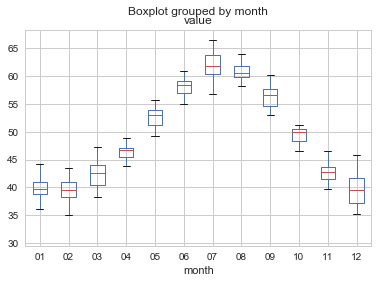

In [3]:
%matplotlib inline
df.boxplot("value", "month")
plt.show()

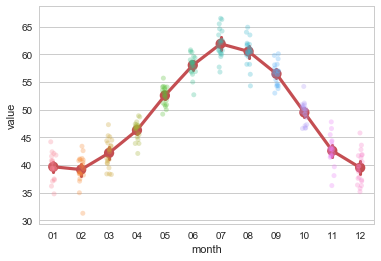

In [4]:
sns.stripplot(x="month", y="value", data=df, jitter=True, alpha=.3)
sns.pointplot(x="month", y="value", data=df, dodge=True, color='r')
plt.show()

In [5]:
model = sm.OLS.from_formula("value ~ C(month) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          2.96e-125
Time:                        23:31:34   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

## 보스턴 집값 데이터의 카테고리 변수

보스턴 집값 데이터는 `CHAS`라는 카테고리 변수를 가지고 있다. 이 변수는 **0과 1 두 개의 값(클래스)를 가지므로 이미 더미 변수로 변환되어 있는 것과 비슷**하다. 즉 다음과 같은 **두 개의 모형을 각각 회귀분석하는 경우**라고 볼 수 있다. 

* `CHAS` = 1 인 경우,
$$ y = (w_0 + w_{\text{CHAS}}) + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,
$$ y = w_0 + w_{\text{CRIM}} \text{CRIM} + w_{\text{ZN}} \text{ZN} + \cdots $$


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [7]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        23:31:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

위 분석에서 두 데이터 그룹은 찰스강에 인접하지 않은 집의 가격 모형은 상수항이 $36.4911$이지만 찰스강에 인접한 집의 가격 모형은 상수항이 $36.4911 + 2.6886 = 39.1797$이라는 것을 알 수 있다.

#### 연습 문제 1

1. `from_formula` 메서드를 사용하여 보스턴 집값 예측 문제를 다시 풀어라. `C()`를 사용하여 카테고리값임을 명시적으로 지정하는 것을 잊으면 안된다.
2. 모형 문자열에서 상수항을 없애지 말고 다시 푼다. 이때 `CHAS` 변수의 가중치는 무엇을 뜻하는가.

In [8]:
# 1번 문제
model = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS\
+ RAD + TAX + PTRATIO + B + LSTAT -1", data = df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        23:32:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4911      5.104      7.149   

In [9]:
# 2번 문제
model = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS\
                            + RAD + TAX + PTRATIO + B + LSTAT", data = df_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 01 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        23:32:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.4911      5.104      7.

- CHAS변수의 값이 0일 경우(CHAS강에 인접하지 않을 경우) 집 가격은 36.49달러 정도이고, CHAS변수의 값이 1인 경우(CHAS강에 인접한 경우) 가격은 36.4911 + 2.6886 = 39.1797 달러 정도일 것이다.